# Spotify Popularity Predictor (39%)

The goal of this challenge is to create a model that predicts the popularity of a song based on its features.

The dataset contains a list of tracks with the following characteristics:
- `acousticness`: whether the track is acoustic
- `danceability`: describes how suitable a track is for dancing
- `duration_ms`: duration of the track in milliseconds
- `energy`: represents a perceptual measure of intensity and activity
- `explicit`: whether the track has explicit lyrics
- `id`: id for the track
- `instrumentalness`: predicts whether a track contains no vocals
- `key`: the key the track is in
- `liveness`: detects the presence of an audience in the recording
- `loudness`: the overall loudness of a track in decibels
- `mode`: modality of a track
- `name`: name of the track
- `popularity`: popularity of the track
- `release_date`: release date
- `speechiness`: detects the presence of spoken words in a track
- `tempo`: overall estimated tempo of a track in beats per minute
- `valence`: describes the musical positiveness conveyed by a track
- `artist`: artist who performed the track

# Model

## Data collection

📝 **Load the `spotify_popularity_train.csv` dataset from the provided URL**
- Display the first few rows
- Perform the basic cleaning operations (remove redundant lines, as well as those with missing values)
- Store the result in a `DataFrame` named `data`

In [2]:
import pandas as pd
import requests
import io
import datetime

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate

from sklearn.linear_model import ElasticNet
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import FunctionTransformer

In [3]:
url = "https://wagon-public-datasets.s3.amazonaws.com/certification_paris_2021Q1/spotify_popularity_train.csv"
s = requests.get(url).content
database = pd.read_csv(io.StringIO(s.decode('utf-8')))

In [4]:
database.head(2)

,acousticness,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,artist
0,0.65400,0.499,219827,0.190,0,0B6BeEUd6UwFlbsHMQKjob,0.00409,7,0.0898,-16.435,1,Back in the Goodle Days,40,1971,0.0454,149.46,0.4300,John Hartford
1,0.00592,0.439,483948,0.808,0,5Gpx4lJy3vKmIvjwbiR5c8,0.14000,2,0.0890,-8.497,1,Worlds Which Break Us - Intro Mix,22,2015-02-02,0.0677,138.04,0.0587,Driftmoon


In [5]:
database.shape

(52317, 18)

In [6]:
#We dropped some duplicate from the database
databasenoduplicate=database.drop_duplicates()

In [7]:
databasenoduplicate.shape

(52057, 18)

In [8]:
databasenoduplicate.isnull().sum().sort_values(ascending=False)

artist              4
valence             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
acousticness        0
dtype: int64

In [9]:
#We dropped the 4 lines where the artist was not present
dataclean=databasenoduplicate.dropna(subset=['artist']) 

In [10]:
data=dataclean

🧪 **Run the following cell to save your results**

In [11]:
from nbresult import ChallengeResult

ChallengeResult(
    "data_cleaning",
    shape=data.shape).write()

## Simple model

📝 **Which sklearn's scoring [metric](https://scikit-learn.org/stable/modules/model_evaluation.html) should we use if we want to:**
- **Strongly penalize** largest errors
- Measure errors **in the same unit** than `popularity` 
- Is better when greater (metric_good_model > metric_bad_model)

👉 Store its exact name as `string` in the variable `scoring` below

🚨 You must use this metric for the rest of the challenge

In [12]:
scoring = "neg_root_mean_squared_error"

**📝 Let's build a first simple linear model using only the numerical features in our dataset to start with**
- Build `X_simple` keeping only numerical features
- Build `y` your target containing the `popularity`

In [13]:
y=data['popularity']

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52053 entries, 0 to 52316
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      52053 non-null  float64
 1   danceability      52053 non-null  float64
 2   duration_ms       52053 non-null  int64  
 3   energy            52053 non-null  float64
 4   explicit          52053 non-null  int64  
 5   id                52053 non-null  object 
 6   instrumentalness  52053 non-null  float64
 7   key               52053 non-null  int64  
 8   liveness          52053 non-null  float64
 9   loudness          52053 non-null  float64
 10  mode              52053 non-null  int64  
 11  name              52053 non-null  object 
 12  popularity        52053 non-null  int64  
 13  release_date      52053 non-null  object 
 14  speechiness       52053 non-null  float64
 15  tempo             52053 non-null  float64
 16  valence           52053 non-null  float6

In [15]:
#By selecting the int64 and float64 data, we automatically drop the id, the name and the artist
X_simple = data.select_dtypes(include=['int64','float64']).drop(columns='popularity')

In [16]:
#we can check what remains in X ; with correct data type and 0 null.
X_simple.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52053 entries, 0 to 52316
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      52053 non-null  float64
 1   danceability      52053 non-null  float64
 2   duration_ms       52053 non-null  int64  
 3   energy            52053 non-null  float64
 4   explicit          52053 non-null  int64  
 5   instrumentalness  52053 non-null  float64
 6   key               52053 non-null  int64  
 7   liveness          52053 non-null  float64
 8   loudness          52053 non-null  float64
 9   mode              52053 non-null  int64  
 10  speechiness       52053 non-null  float64
 11  tempo             52053 non-null  float64
 12  valence           52053 non-null  float64
dtypes: float64(9), int64(4)
memory usage: 5.6 MB


Note : as this part of the exercise is well guided and it is explicitely asked not to fine-tune anything ; I purposely decided not to scale the numeric variable for the very first models.

### Holdout evaluation

**📝 Create the 4 variables `X_train_simple` `y_train`, `X_test_simple`, `y_test` with a 50% split with random sampling**

In [17]:
X_train_simple, X_test_simple, y_train, y_test = train_test_split(X_simple, y, test_size=0.5)

**📝 Fit and evaluate a basic linear model (do not fine tune it) with this holdout method**
- Store your model true performance in a float variable `score_simple_holdout`

In [18]:
model = LinearRegression()
model.fit(X_train_simple, y_train)

LinearRegression()

In [19]:
y_pred=model.predict(X_test_simple)

In [20]:
from sklearn.metrics import mean_squared_error
result=-mean_squared_error(y_test, y_pred,squared=False)

In [21]:
result

-18.314325970030986

In [22]:
score_simple_holdout=result

### Cross-validation evaluation

📝 **Let's be sure our score is representative**: 
- 5-times cross validate a basic linear model on the whole numeric dataset (`X_simple`, `y`)
- Do not fine tune your model
- Store your mean performance in a variable `score_simple_cv_mean` as a `float`
- Store the standard deviation of your performances in a float variable `score_simple_cv_std`

In [23]:
model = LinearRegression()
cv_results = cross_validate(model, X_simple, y, cv=5, scoring="neg_root_mean_squared_error")
cv_results

{'fit_time': array([0.01365972, 0.01491809, 0.01914883, 0.02465367, 0.01488495]),
 'score_time': array([0.00236106, 0.00395799, 0.00423312, 0.00264525, 0.00286508]),
 'test_score': array([-18.41383767, -18.45203104, -18.30188799, -18.43790327,
        -18.19713279])}

In [24]:
score_simple_cv_mean=cv_results['test_score'].mean()

In [25]:
score_simple_cv_std=cv_results['test_score'].std()

🧪 **Run the following cell to save your results**

In [26]:
from nbresult import ChallengeResult

ChallengeResult(
    "simple_model",
    scoring=scoring,
    shape_train = X_train_simple.shape,
    score_simple_holdout=score_simple_holdout,
    score_simple_cv_mean=score_simple_cv_mean,
    score_simple_cv_std=score_simple_cv_std,
).write()

## Feature engineering

(From now on, we will stop using train/test split but cross-validation on the whole dataset instead)  

Let's try to improve performance using the feature `release_date`

**📝 Create `X_engineered` by adding a new column `year` to `X`, containing the release year of the track as `integer`**

In [27]:
X_engineered=X_simple

In [28]:
X_engineered['year'] = pd.to_datetime(data['release_date']).dt.year

In [29]:
X_engineered.head()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,year
0,0.65400,0.499,219827,0.190,0,0.004090,7,0.0898,-16.435,1,0.0454,149.460,0.4300,1971
1,0.00592,0.439,483948,0.808,0,0.140000,2,0.0890,-8.497,1,0.0677,138.040,0.0587,2015
2,0.73400,0.523,245693,0.288,0,0.000000,0,0.0771,-11.506,1,0.2140,75.869,0.4640,1968
3,0.42900,0.681,130026,0.165,0,0.000000,11,0.3940,-21.457,0,0.9460,145.333,0.2880,1926
4,0.56200,0.543,129813,0.575,0,0.000004,2,0.1270,-7.374,1,0.0265,139.272,0.8010,2008


📝 **Let's see how this impact the performance of our model.**
- Retrain the same simple linear model on numerical values only, adding the new feature `year`
- Save the mean cross-validated performance metric in a variable named `score_engineered` as a `float`
- Do not fine tune the model yet

In [30]:
model = LinearRegression()
cv_results = cross_validate(model, X_engineered, y, cv=5, scoring="neg_root_mean_squared_error")
cv_results

{'fit_time': array([0.01504779, 0.01630664, 0.02255177, 0.01649284, 0.01555705]),
 'score_time': array([0.00956368, 0.01289558, 0.0035584 , 0.00689626, 0.00260305]),
 'test_score': array([-17.4412204 , -17.4317139 , -17.2453717 , -17.32187397,
        -17.06965388])}

In [31]:
#the addition of the feature year as a significant impact on the score

In [32]:
score_engineered=cv_results['test_score'].mean()

🧪 **Run the following cell to save your results**

In [33]:
from nbresult import ChallengeResult

ChallengeResult("feature_engineering",
    cols = X_engineered.columns,
    years = X_engineered.get("year"),
    score_engineered=score_engineered
).write()

## Pipelining

Let's now look for maximum performance by creating a solid preprocessing pipeline.

**📝 Create a sklearn preprocessing [pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) and store it as `preproc`**

- Feel free to add any preprocessing steps you think of
- You may want to integrate your feature engineering for `year`
- You may also further improve it using the `ArtistPopularityTransformer` class given to you below
- Don't add any model to it yet

🚨 Advice: It is better for you to have a working pipeline (even simple one) rather than NO pipeline at all

In [34]:
# 👉 Do not hesitate to reload a clean new dataset if you need a fresh start.
X=data.drop(columns='popularity')
y=data['popularity']

<AxesSubplot:>

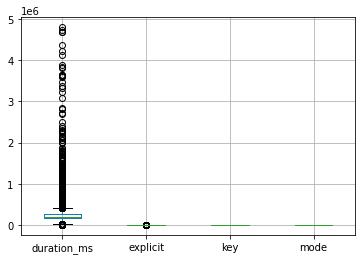

In [35]:
X.select_dtypes(include=['int64']).boxplot()

<AxesSubplot:>

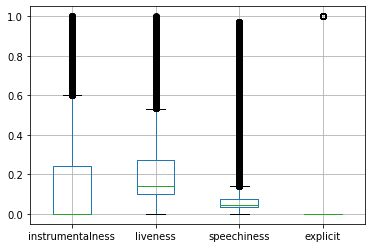

In [45]:
X[['instrumentalness','liveness','speechiness','explicit']].boxplot()

<AxesSubplot:>

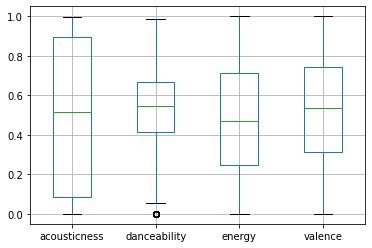

In [48]:
X[['acousticness','danceability','energy', 'valence']].boxplot()

<AxesSubplot:>

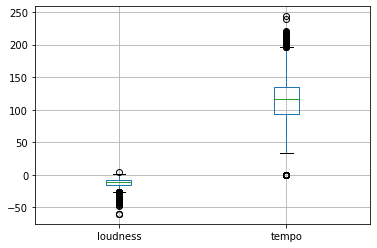

In [49]:
X[['loudness','tempo']].boxplot()

In [50]:
# Scale for numerical variables: 
# We could decide to do some robust scaling, typically on the duration_ms which as lots of outliers
# The variables which are already between 0 and 1 would not necessarily need to be rescaled
# => But here for time reasons we decided to keep thing simple and apply the same standard scaler to all the numerical features

num_transformer = Pipeline([('scaler', StandardScaler())])

preprocnum = ColumnTransformer([
    ('num_transformer', num_transformer, make_column_selector(dtype_include=['float64', 'int64']))])


In [51]:
# We are giving you below a custom transformer that you may want to use in your pipeline (make sure you understanding it)

from sklearn.base import BaseEstimator, TransformerMixin

class ArtistPopularityTransformer(BaseEstimator, TransformerMixin):
    """
    Compute, as a new feature of the test set, the mean popularity of 
    all songs made by the artist on the train set.
    """

    def __init__(self):
        pass

    def fit(self, X, y=None):
        """
        process artist mean popularity from artists songs popularity
        process song global mean popularity
        """

        # process artist popularity
        self.artist_popularity = y.groupby(X.artist).agg("mean")
        self.artist_popularity.name = "artist_popularity"

        # process mean popularity
        self.mean_popularity = y.mean()

        return self

    def transform(self, X, y=None):
        """
        apply artist mean popularity vs song global mean popularity to songs
        """

        # inject artist popularity
        X_copy = X.merge(self.artist_popularity, how="left", left_on="artist", right_index=True)

        # fills popularity of unknown artists with song global mean popularity
        X_copy.replace(np.nan, self.mean_popularity, inplace=True)

        return X_copy[["artist_popularity"]]

In [52]:
# Create a transformer that add artistpopularity
artistpoptrans=ArtistPopularityTransformer()

# Create a transformer that add the year
year_calc=FunctionTransformer(lambda data: pd.DataFrame(pd.to_datetime(data['release_date']).dt.year))


#Bring them together with feature Union
preproc_inter = FeatureUnion([
    ('artistpoptrans', artistpoptrans),
    ('year_calc',year_calc),
    ('preprocnum', preprocnum),   
])

In [53]:
#Adding another layer of standard scaler to scale the new columns (year / artist pop). This does not affect the other column which have already been scaled.
preproc = Pipeline([('preproc_inter', preproc_inter),('scaler', StandardScaler())])

In [55]:
#we can have a quick visual look on the table to check whether it looks clean
pd.DataFrame(preproc.fit_transform(X,y))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.460356,-0.220188,0.410158,-0.212695,-0.088403,-1.076387,-0.273715,-0.574119,0.512789,-0.676648,-0.823320,0.645835,-0.332502,1.069938,-0.359104
1,-0.792680,1.418465,-1.296168,-0.552799,1.754475,1.187137,-0.273715,-0.166816,-0.904957,-0.681084,0.570288,0.645835,-0.210526,0.692617,-1.766522
2,0.426941,-0.331914,0.620789,-0.076653,0.092074,-0.717446,-0.273715,-0.586376,-1.472056,-0.747067,0.042023,0.645835,0.589701,-1.361536,-0.230227
3,-1.104899,-1.896083,-0.182243,0.818954,-0.714981,-1.167954,-0.273715,-0.586376,1.646985,1.010077,-1.704990,-1.548384,4.593569,0.933581,-0.897357
4,-0.627465,1.157770,0.167932,0.036715,-0.716467,0.333737,-0.273715,-0.586365,-0.904957,-0.470382,0.767444,0.645835,-0.435880,0.733323,1.047177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52048,-0.040858,0.003265,-0.879960,-0.139006,-1.229725,1.549740,-0.273715,-0.571782,0.229239,3.266807,0.691952,0.645835,3.040156,-1.039525,-0.795013
52049,0.147097,-0.443641,0.723472,-0.019969,-0.276717,0.641400,-0.273715,1.730197,-0.904957,-0.548009,0.461440,-1.548384,-0.347817,1.364196,0.338350
52050,-1.293894,1.604676,-0.111155,0.065057,0.546631,0.308098,-0.273715,-0.586376,0.229239,-0.679975,1.123132,0.645835,-0.430410,-1.307813,-0.707832
52051,-1.264876,-0.927788,1.228988,-1.000603,-0.111666,-1.288821,-0.273715,-0.586376,1.363436,-0.475927,-1.627217,0.645835,-0.386652,-1.195013,-0.434915


**📝 Store the number of columns/feature after preprocessing your inputs in a variable `col_number`**

In [56]:
col_number=15

🧪 **Run the following cells to save your results**

In [57]:
# Visually print your preproc
from sklearn import set_config; set_config(display='diagram')
preproc

Pipeline(steps=[('preproc_inter',
                 FeatureUnion(transformer_list=[('artistpoptrans',
                                                 ArtistPopularityTransformer()),
                                                ('year_calc',
                                                 FunctionTransformer(func=<function <lambda> at 0x7fa2a7f26550>)),
                                                ('preprocnum',
                                                 ColumnTransformer(transformers=[('num_transformer',
                                                                                  Pipeline(steps=[('scaler',
                                                                                                   StandardScaler())]),
                                                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fa2a7c9a3d0>)]))])),
                ('scaler', StandardScaler())])

In [58]:
# Save your preproc
from nbresult import ChallengeResult

ChallengeResult(
    "preprocessing",
    col_number=col_number,
    first_observation = preproc.fit_transform(X, y)[0]
).write()

## Training

📝 **Time to fine tune your models**

- Add an **estimator** to your pipeline (only from Scikit-learn) 

- Train your pipeline and **fine-tune** (optimize) your estimator to maximize prediction score

- You must try to fine tune at least 2 different models: 
    - create one pipeline with a **linear model** of your choice
    - create one pipeline with an **ensemble model** of your choice

Then, 

- Save your two best 5-time cross-validated scores as _float_: `score_linear` and `score_ensemble`

- Save your two best trained pipelines as _Pipeline_ objects: `pipe_linear` and `pipe_ensemble`

### Linear

In [59]:
#here we decide to go with an elastic net to play together with the ridge and lasso finetuning parameters
pipe_linear = Pipeline([
    ('preprocessing', preproc),
    ('linear_regression', ElasticNet())])

In [61]:
#let's do a first test to see if everythinbg goes ok
cv_results = cross_validate(pipe_linear, X, y, scoring = "neg_root_mean_squared_error", cv=5)
print('Neg RMSE: ',cv_results['test_score'].mean())

Neg RMSE:  -14.005544853728978


In [62]:
#let's find the alpha and l1 ratio parameters for fine-tuning
pipe_linear.get_params()

{'memory': None,
 'steps': [('preprocessing', Pipeline(steps=[('preproc_inter',
                    FeatureUnion(transformer_list=[('artistpoptrans',
                                                    ArtistPopularityTransformer()),
                                                   ('year_calc',
                                                    FunctionTransformer(func=<function <lambda> at 0x7fa2a7f26550>)),
                                                   ('preprocnum',
                                                    ColumnTransformer(transformers=[('num_transformer',
                                                                                     Pipeline(steps=[('scaler',
                                                                                                      StandardScaler())]),
                                                                                     <sklearn.compose._column_transformer.make_column_selector object at 0x7fa2a7c9a3d0>)]))])),
 

In [63]:
# and do a grid search - the parameters found here are the result of few iterations to "zoom" on optimal parameters
grid_search = GridSearchCV(
    pipe_linear, 
    param_grid={
        'linear_regression__alpha': [0.05, 0.1, 0.15],
        'linear_regression__l1_ratio': [0.1, 0.2, 0.3]},
    cv=5,
    scoring="neg_root_mean_squared_error")

grid_search.fit(X, y)
grid_search.best_params_

{'linear_regression__alpha': 0.15, 'linear_regression__l1_ratio': 0.1}

In [66]:
#we see some improvement with the optimized parameters
grid_search.best_score_

-13.309793641587657

In [67]:
score_linear=grid_search.best_score_

### Ensemble

In [68]:
# we decide to go with gradient boost regressor
pipe_ensemble = Pipeline([
    ('preprocessing', preproc),
    ('GradientBoost', GradientBoostingRegressor())])

In [69]:
#as before, let's go for a dry-run
cv_results = cross_validate(pipe_ensemble, X, y, scoring = "neg_root_mean_squared_error", cv=5)
print('Neg RMSE: ',cv_results['test_score'].mean())

Neg RMSE:  -12.478906548174546


In [70]:
#let's find the n_estimator and learning rate parameters for fine-tuning
pipe_ensemble.get_params()

{'memory': None,
 'steps': [('preprocessing', Pipeline(steps=[('preproc_inter',
                    FeatureUnion(transformer_list=[('artistpoptrans',
                                                    ArtistPopularityTransformer()),
                                                   ('year_calc',
                                                    FunctionTransformer(func=<function <lambda> at 0x7fa2a7f26550>)),
                                                   ('preprocnum',
                                                    ColumnTransformer(transformers=[('num_transformer',
                                                                                     Pipeline(steps=[('scaler',
                                                                                                      StandardScaler())]),
                                                                                     <sklearn.compose._column_transformer.make_column_selector object at 0x7fa2a7c9a3d0>)]))])),
 

In [71]:
# and do a grid search - the parameters found here are the result of few (long) iterations to "zoom" on optimal parameters
grid_search2 = GridSearchCV(
    pipe_ensemble, 
    param_grid={
        'GradientBoost__n_estimators': [50, 100, 150],
        'GradientBoost__learning_rate': [0.05, 0.1, 0.2]},
    cv=5,
    scoring="neg_root_mean_squared_error")

grid_search2.fit(X, y)
grid_search2.best_params_

{'GradientBoost__learning_rate': 0.2, 'GradientBoost__n_estimators': 150}

In [72]:
grid_search2.best_score_

-12.255651112409762

In [73]:
score_ensemble=grid_search2.best_score_

🧪 **Run the following cells to save your results**

In [74]:
score_simple_cv_mean

-18.36055855156932

In [75]:
score_engineered

-17.301966769706553

In [76]:
score_linear

-13.309793641587657

In [77]:
score_ensemble

-12.255651112409762

In [78]:
#we can see that through adding some features, scaling the data, then utilizing more advanced model and finetuning these models,
#=> we achived a significant improvement !!

In [79]:
# Print below your best pipe for correction purpose
from sklearn import set_config; set_config(display='diagram')
pipe_linear

Pipeline(steps=[('preprocessing',
                 Pipeline(steps=[('preproc_inter',
                                  FeatureUnion(transformer_list=[('artistpoptrans',
                                                                  ArtistPopularityTransformer()),
                                                                 ('year_calc',
                                                                  FunctionTransformer(func=<function <lambda> at 0x7fa2a7f26550>)),
                                                                 ('preprocnum',
                                                                  ColumnTransformer(transformers=[('num_transformer',
                                                                                                   Pipeline(steps=[('scaler',
                                                                                                                    StandardScaler())]),
                                                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x7fa2a7c9a3d0>)]))])),
                                 ('scaler', StandardScaler())])),
                ('linear_regression', ElasticNet())])

In [80]:
# Print below your best pipe for correction purpose
pipe_ensemble

Pipeline(steps=[('preprocessing',
                 Pipeline(steps=[('preproc_inter',
                                  FeatureUnion(transformer_list=[('artistpoptrans',
                                                                  ArtistPopularityTransformer()),
                                                                 ('year_calc',
                                                                  FunctionTransformer(func=<function <lambda> at 0x7fa2a7f26550>)),
                                                                 ('preprocnum',
                                                                  ColumnTransformer(transformers=[('num_transformer',
                                                                                                   Pipeline(steps=[('scaler',
                                                                                                                    StandardScaler())]),
                                                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x7fa2a7c9a3d0>)]))])),
                                 ('scaler', StandardScaler())])),
                ('GradientBoost', GradientBoostingRegressor())])

In [81]:
from nbresult import ChallengeResult

ChallengeResult("model_tuning",
    scoring = scoring,
    score_linear=score_linear,
    score_ensemble=score_ensemble).write()

## API 

Time to put a pipeline in production!

👉 Go to https://github.com/lewagon/data-certification-api and follow instructions

**This final part is independent from the above notebook**

In [ ]:
https://certif-33vjx73zaq-ew.a.run.app/predict?acousticness=0.654&danceability=0.499&duration_ms=219827&energy=0.19&explicit=0&id=0B6BeEUd6UwFlbsHMQKjob&instrumentalness=0.00409&key=7&liveness=0.0898&loudness=-16.435&mode=1&name=Back%20in%20the%20Goodle%20Days&release_date=1971&speechiness=0.0454&tempo=149.46&valence=0.43&artist=John%20Hartford